# Assignment: Follow-ups to Parameter Estimation notebooks 

**Goal:** work through the `parameter_estimation_fitting_straight_line_I.ipynb` and `amplitude_in_presence_of_background.ipynb` notebooks, doing some of the suggested tasks and answering selected questions, as detailed below.  

### Learning goals:
* Improve your understanding of the Python code in our sample notebooks.
* Be able to articulate basic scaling of fluctuations, the signature of correlations, and the role of priors.
* Gain experience with a basic Bayesian experimental design problem.
* Explore an example of the central limit theorem both analytically and numerically.

## A. Parameter estimation example: fitting a straight line I

1. Step through the notebook and make sure you understand the notation and calculations.  Try writing the requested pieces of Python code; if you have difficulty, study the supplied code instead and identify what parts you don't understand.  (You don't need to hand in anything for this part but please list here any questions you have.)
<br><br><br><br>

1. Do exercise 3: Change the random number seed to get different results and comment on how the maximum likelihood results fluctuate. How is the typical size of fluctuations related to the number of data points $N$ and the data error standard deviation $dy$? E.g., are they proportional to $N$ or $dy^2$ or what?  (Try changing $N$ and $dy$ to test your answer!)
<br><br><br><br>

1. In both sets of joint posterior graphs, are the slope and intercept correlated?  How do you know? Explain how they get correlated.
<br><br><br><br>

1. For the first set of data, answer the question: "What do you conclude about how the form of the prior affects the final posterior in this case?"
<br><br><br><br>

1. For the second set of data, answer the question: "Why in this case does the form of the prior have a clear effect?"  You should consider both the size of the error bars and the number of data points (and try changing them to verify the impact).
<br><br><br><br>


Part 1: no questions yet, but they are coming

In [79]:
#Do exercise 3 Mine for large N
#Making a change in the random number seed to see how the maximum likelihood results fluctuate
# Exercise 3

def make_data(intercept, slope, N=1000, dy=0, rseed=10):
    """Given a straight line defined by intercept and slope:
          y = slope * x + intercept
       generate N points randomly spaced points from x=0 to x=100
       with Gaussian (i.e., normal) error with mean zero and standard
       deviation dy.
       
       Return the x and y arrays and an array of standard deviations.
    """
    rand = np.random.RandomState(rseed) 
    x = 100 * rand.rand(N)  # choose the x values randomly in [0,100]
    y = intercept + slope * x  # This is the y value without noise
    y += dy * rand.randn(N)    # Add in Gaussian noise
    return x, y, dy * np.ones_like(x)  # return coordinates and error bars

intercept = 25.   # true intercept (called b elsewhere)
slope = 0.5       # true slope (called m elsewhere)
theta_true = [intercept, slope]  # put parameters in a true theta vector
x, y, dy = make_data(*theta_true, rseed=42)

def log_likelihood(theta, x, y, dy):
    y_model = theta[0] + theta[1] * x
    return -0.5 * np.sum(np.log(2 * np.pi * dy**2) + (y - y_model)**2 / dy**2)

from scipy import optimize

def minfunc(theta, x, y, dy):
    """
    Function to be minimized: minus the logarithm of the likelihood.
    """
    return -log_likelihood(theta, x, y, dy)



result = optimize.minimize(minfunc, x0=[0, 0], args=(x, y, dy))

# try without np.printoptions to see what you get
with np.printoptions(precision=3, suppress=True):
    print(f'result: {result.x}')
    print(f'input:  {theta_true}')


result: [42.477  0.345]
input:  [25.0, 0.5]
result: [42.477  0.345]
input:  [25.0, 0.5]
result: [22.908  0.546]
input:  [25.0, 0.5]


In [78]:
x, y, dy = make_data(*theta_true, rseed=42)

result = optimize.minimize(minfunc, x0=[0, 0], args=(x, y, dy))

# try without np.printoptions to see what you get
with np.printoptions(precision=3, suppress=True):
    print(f'result: {result.x}')
    print(f'input:  {theta_true}')


result: [28.179  0.461]
input:  [25.0, 0.5]
result: [23.879  0.506]
input:  [25.0, 0.5]


In [60]:
x, y, dy = make_data(*theta_true, rseed=41)

result = optimize.minimize(minfunc, x0=[0, 0], args=(x, y, dy))

# try without np.printoptions to see what you get
with np.printoptions(precision=3, suppress=True):
    print(f'result: {result.x}')
    print(f'input:  {theta_true}')

result: [26.105  0.44 ]
input:  [25.0, 0.5]


Part 2. continued: The fluctuations are completely random as I continued to make changes to the rseed from 1 to 100. As you increase the N we continue to get closer and closer to true answer. Then the results starts to fluctuate around the true answer. As we change dy, we get a larger and larger answer for our result. Yet if you increase the count, N, then we obtain an answer closer and closer to the true result. By increasing the value of N by ten times its value we are able to bring the value closer to the true value. So what I have observe is that a increase of N times ten is able to bring the results down by about 20, closer to the true result.

Part 3. From what I can see on these graph, it looks as though the slope and intercept are both correlated. 
I assume this because both graphs show the slope and the intercept to be negatively correlated.

Part 4. The prior has very little effect. When enough data has been obtain it is very effect when it comes to contrainting the model. Therefore, we must have enough prior data. I am sure that if we further increase the N value and maintain a relatively low dy we can get a constraint model that is even closer to the true result. 

Part 5. There is clearly not enough data.(I.e. There are not enough, N, counts.) And the dy is relatively large. Using my thoughts and theory from Part 2 of this question it becomes clear that through increasing the N and decrease the dy we get a closer true value. The error bars for each point shrinks as well. The lack of data makes it hard if not boarderline impossible to find the true result. Note, when I go to the extremes with these values I am starting to get the error:

"ValueError: Contour levels must be increasing"

## B. Amplitude of a signal in the presence of background

1. Step through the notebook and make sure you understand the problem and its analysis. You may find the discussion in Section 3.1 of *Sivia and Skilling, Data Analysis: A Bayesian Tutorial* useful (see Carmen modules). You don't need to hand in anything for this part but please list here any questions you have.
<br><br><br><br>

1. Do the "Follow-ups": 
   * *Try both smaller and larger values of D and note the transition in the form of the pdf.*
   * At $D=12.5$ the pdf is already looking like a Gaussian (or what most of us imagine a Gaussian to look like).  *Prove that in the limit $D \rightarrow \infty$ that* 
   
$$
 p(N \mid D) \stackrel{D\rightarrow\infty}{\longrightarrow} \frac{1}{\sqrt{2\pi D}}e^{-(N-D)^2/(2D)}
$$

You'll want to use Stirling's formula:  $x! \rightarrow \sqrt{2\pi x}e^{-x} x^x$ as $x\rightarrow\infty$.
\[Hint: let $x = N = D(1+\delta)$ where $D\gg 1$ and $\delta \ll 1$.  And use $(1+\delta)^a = e^{a\ln (1+\delta)}$.\]
<br><br><br><br>
   * *Show that this limit works in practice and visualize how close it is by adding the Gaussian pdf to the plot.* (See [scipy.stats.norm](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) or define a function yourself.)  **Add code below to make a figure here with the limiting Poisson histogram and the limiting Gaussian pdf.**
<br><br><br><br>

1. Based on your observations in running the different cases (and any additional ones you add), how should you optimally design an experiment to detect the amplitude of the signal given limited resources?  For example: How many counts are needed? How should you bin the data? What $(x_k)_{\rm max}$ should you use? 
<br><br><br><br>


Part 1: no questions yet, but they are coming

In [40]:
# 2 Do the "follow-ups"
#Imports:
%matplotlib inline  

import numpy as np
from math import factorial

# We'll get our uniform distributions from stats, but there are other ways.
import scipy.stats as stats  
import scipy.integrate as integrate
from scipy import interpolate

import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 

from mpl_toolkits import mplot3d
from matplotlib import cm

plt.rcParams.update({'font.size': 16})

#Extra stuff that needs to be included: 
A_true = 1.
B_true = 2.
width = np.sqrt(5.)   
x_0 = 0

0

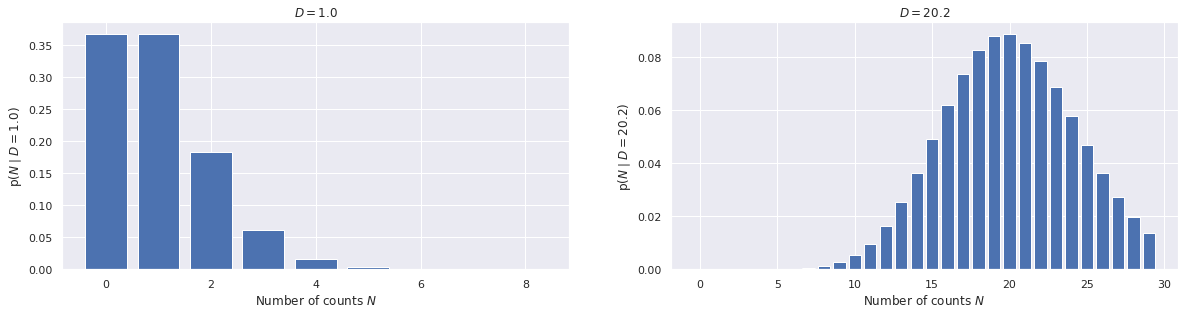

In [41]:
# Smaller and larger values of D
def poisson(N, D):
    """
    Returns a Poisson distribution value with mean D for integer N.
    We require N to be an integer greater than equal to zero.
    """
    assert (isinstance(N, int) and N >= 0), \
            "N must be a non-negative integer!"

    return D**N * np.exp(-D) / factorial(N) 

def poisson_plot(ax, D, max_N):
    """
    Make a bar plot on the axis ax of the Poisson distribution for mu = D
    and out to a maximum integer max_N.
    """
    N_pts = np.arange(0, max_N, 1, dtype=int)
    poisson_pts = [poisson(int(N), D) for N in N_pts]
    ax.bar(N_pts, poisson_pts, width=0.8, bottom=None, align='center')
    ax.set_xlabel(r'Number of counts $N$')
    ax.set_ylabel(fr'$\mathrm{{p}}(N \mid D={D:.1f})$')
    ax.set_title(rf'$D = {D:.1f}$')
    return 0

fig = plt.figure(figsize=(20,10))

D1 = 1
max_N1 = 9
ax1 = fig.add_subplot(2,2,1)
poisson_plot(ax1, D1, max_N1)

ax2 = fig.add_subplot(2,2,2)
D2 = 20.2
max_N2 = 30
poisson_plot(ax2, D2, max_N2)


# Solved out using the Stirling's formula Section 2:
This was done in combination of hints and series expansions
$$
\frac{D^{N}}{N!}e^{-D} {\longrightarrow}
\frac{D^{N}}{\sqrt{2\pi x}e^{-x}x^{x}}e^{-D} {\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi D({1+\delta})}e^{-D({1+\delta})}D({1+\delta})^{D({1+\delta})}} {\longrightarrow} 
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-D({1+\delta})}D({1+\delta})^{D({1+\delta})+\frac{1}{2}}} {\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-D({1+\delta})}D^{^{D({1+\delta})+\frac{1}{2}}}({1+\delta})^{D({1+\delta})+\frac{1}{2}}}{\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-D({1+\delta})}D^{^{D({1+\delta})+\frac{1}{2}}}e^{(D({1+\delta})+\frac{1}{2})ln(1+\delta)}}{\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-D({1+\delta})}D^{^{D({1+\delta})+\frac{1}{2}}}e^{(D+{D\delta})+\frac{1}{2})({\delta - \frac{\delta^2}{2}})}}{\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-D({1+\delta})}D^{^{D({1+\delta})+\frac{1}{2}}}e^{({D\delta}-\frac{{D\delta^2}}{2}+\frac{{D\delta^3}}{2}+\frac{{\delta}}{2}-\frac{{\delta^2}}{4})}}{\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-D({1+\delta})}D^{^{D({1+\delta})+\frac{1}{2}}}e^{({D\delta}-\frac{{D\delta^2}}{2})}}{\longrightarrow}
\frac{D^{N}e^{-D}}{\sqrt{2\pi}e^{-{D-D\delta}}D^{^{D({1+\delta})+\frac{1}{2}}}e^{({D\delta}-\frac{{D\delta^2}}{2})}}{\longrightarrow}
\frac{D^{N}e^{-D\delta}}{\sqrt{2\pi}DD^{N}e^{({D\delta}-\frac{{D\delta^2}}{2})}}{\longrightarrow}
\frac{e^{({-D\delta}-\frac{{D\delta^2}}{2})}e^{-D\delta}}{\sqrt{2\pi D}}{\longrightarrow}
\frac{e^{{-\frac{{D\delta^2}}{2}}}}{\sqrt{2\pi D}}{\longrightarrow}
\frac{e^{{-D\frac{(\frac{{N - D}}{2})}{2}^2}}}{\sqrt{2\pi D}}{\longrightarrow}
\frac{e^{{\frac{({N - D})}{2D}^2}}}{\sqrt{2\pi D}}{\longrightarrow}
$$

1. Based on your observations in running the different cases (and any additional ones you add), how should you optimally design an experiment to detect the amplitude of the signal given limited resources?  For example: How many counts are needed? How should you bin the data? What $(x_k)_{\rm max}$ should you use? 

To optimally design an experiment to detect the amplitude of the signal given limited resources lets maintain a x_delta value equal to one. The count should be about 300 with a bin of 26 from my observation. However, if the x_delta is allowed to change then we should increase the number of counts and lower the number of bins. For example, using the same Amplitude notebook if we set the count to 500, bins to 5, and x_delta to 10 then we should still get an accurate number. 